In [1]:
import sys
sys.path.append('../../')

from codes.docs.analysis import data_preprocessing,genetic_file_preprocess
from codes.docs.analysis.nimagen import stats, visualisation, genes

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict
%matplotlib inline
import tqdm

import statsmodels.api as sm
import statsmodels.formula.api as sfm

from scipy.stats import ttest_ind, pearsonr,zscore
import pandas as pd
import re

In [2]:
df = pd.read_csv('eur_cohort_segmented_scz_prs_all.csv')

In [3]:
thresholds = [i for i in df.columns if 'SCZ_PRS_Pt_0.001' in i]

In [23]:
df_SCZ_PRS_Pt_00001 = df[thresholds].copy()

In [27]:
df_SCZ_PRS_Pt_00001.columns = ['_'.join(i.split('_')[4:]) for i in df_SCZ_PRS_Pt_00001.columns]

In [29]:
corr = df_SCZ_PRS_Pt_00001.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

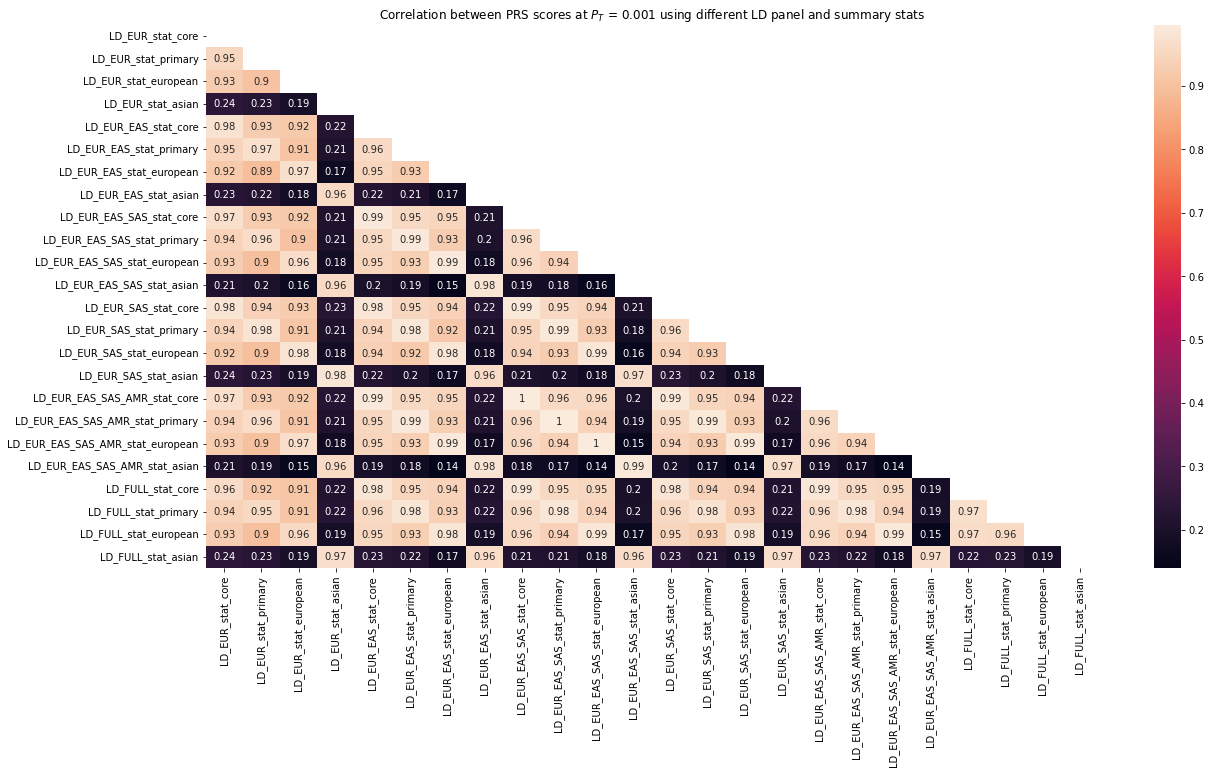

In [33]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,mask=mask,annot=True,ax = ax)
ax.set_title('Correlation between PRS scores at $P_T$ = 0.001 using different LD panel and summary stats')
fig.savefig('correlation_map.png')

In [3]:
thresholds = [i for i in df.columns if 'SCZ_PRS_Pt_0.001' in i and 'asian' not in i]

In [35]:
df_SCZ_PRS_Pt_00001_ex_asian = df[thresholds].copy()

In [36]:
df_SCZ_PRS_Pt_00001_ex_asian.columns = ['_'.join(i.split('_')[4:]) for i in df_SCZ_PRS_Pt_00001_ex_asian.columns]

In [37]:
corr = df_SCZ_PRS_Pt_00001_ex_asian.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

[Text(0.5, 0, 'LD_EUR_stat_core'),
 Text(1.5, 0, 'LD_EUR_stat_primary'),
 Text(2.5, 0, 'LD_EUR_stat_european'),
 Text(3.5, 0, 'LD_EUR_EAS_stat_core'),
 Text(4.5, 0, 'LD_EUR_EAS_stat_primary'),
 Text(5.5, 0, 'LD_EUR_EAS_stat_european'),
 Text(6.5, 0, 'LD_EUR_EAS_SAS_stat_core'),
 Text(7.5, 0, 'LD_EUR_EAS_SAS_stat_primary'),
 Text(8.5, 0, 'LD_EUR_EAS_SAS_stat_european'),
 Text(9.5, 0, 'LD_EUR_SAS_stat_core'),
 Text(10.5, 0, 'LD_EUR_SAS_stat_primary'),
 Text(11.5, 0, 'LD_EUR_SAS_stat_european'),
 Text(12.5, 0, 'LD_EUR_EAS_SAS_AMR_stat_core'),
 Text(13.5, 0, 'LD_EUR_EAS_SAS_AMR_stat_primary'),
 Text(14.5, 0, 'LD_EUR_EAS_SAS_AMR_stat_european'),
 Text(15.5, 0, 'LD_FULL_stat_core'),
 Text(16.5, 0, 'LD_FULL_stat_primary'),
 Text(17.5, 0, 'LD_FULL_stat_european')]

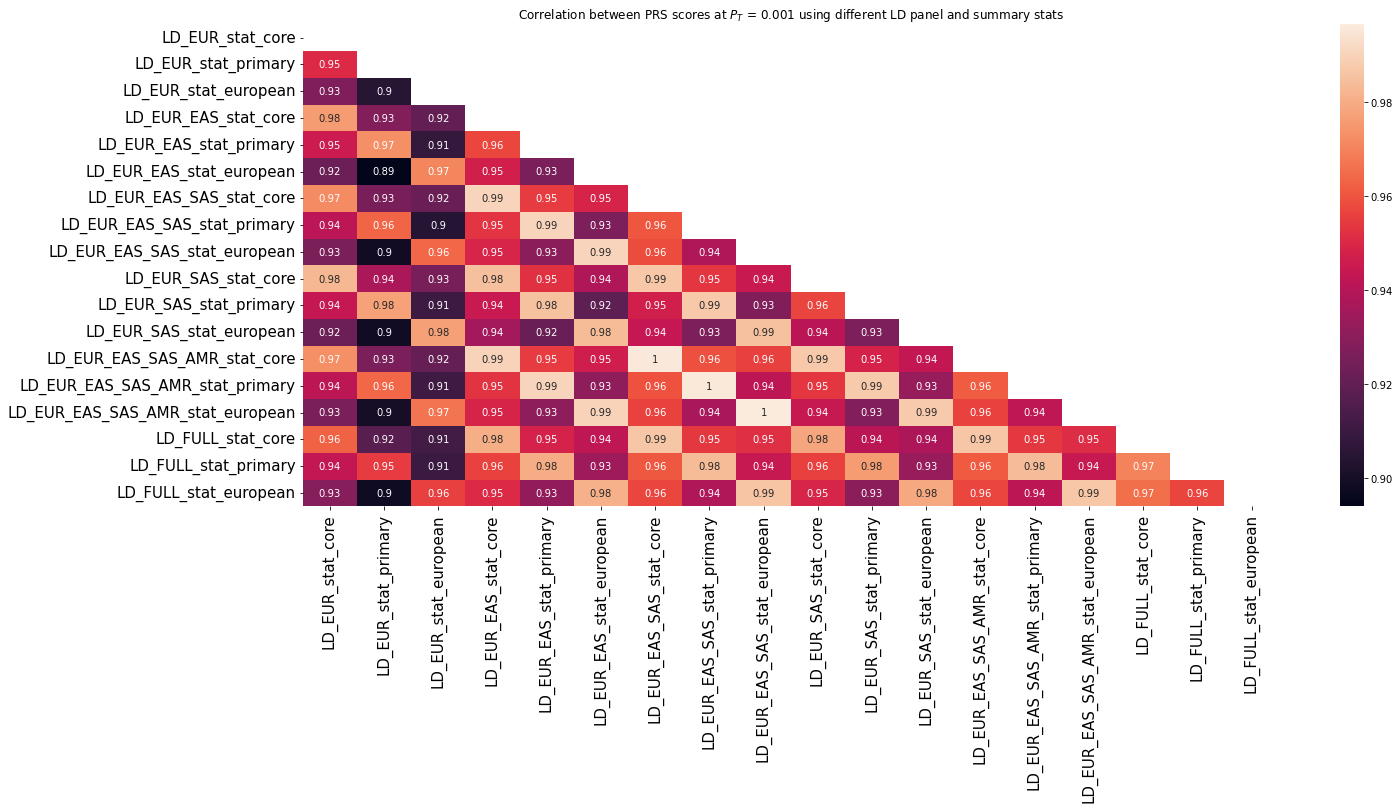

In [46]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,mask=mask,annot=True,ax = ax)
ax.set_title('Correlation between PRS scores at $P_T$ = 0.001 using different LD panel and summary stats')
plt.tight_layout()
yticks,ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_yticklabels(ylabels,size=15)
ax.set_xticklabels(xlabels,size=15,rotation=90)
# fig.savefig('correlation_map_ex_asian.png')

In [16]:
euro_result = stats.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=[i for i in df.columns if 'SCZ_PRS' in i and 'asian' not in i],
    cat_independentVar_cols=['sex'],
    cont_independentVar_cols=['GA','PMA','TBV']+[f'euro_Anc_PC{i}' for i in range(1,4)],
    dependentVar_cols=['Imperial 79']
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:05<00:00, 33.71it/s]


In [32]:
euro_result.sort_values(by='PRS_pval')

,Connection,Intercept_coef,Intercept_pval,C(sex)[T.male]_coef,C(sex)[T.male]_pval,standardize(GA)_coef,standardize(GA)_pval,standardize(PMA)_coef,standardize(PMA)_pval,standardize(TBV)_coef,...,standardize(Q('euro_Anc_PC2'))_coef,standardize(Q('euro_Anc_PC2'))_pval,standardize(Q('euro_Anc_PC3'))_coef,standardize(Q('euro_Anc_PC3'))_pval,PRS_coef,PRS_pval,threshold,pt,LD,stat
58,Imperial 79,30014.155263,0.0,234.217292,0.141540,15.366204,0.864002,-1669.394371,1.705499e-28,4131.974823,...,78.160879,0.274098,-91.771596,0.197687,-291.710608,0.000084,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european,0.01,LD_EUR_EAS,european
49,Imperial 79,29998.387991,0.0,265.409070,0.095906,17.996337,0.841280,-1671.128917,1.877027e-28,4136.373622,...,61.067680,0.397803,-87.724227,0.219061,-281.913359,0.000147,SCZ_PRS_Pt_0.05_LD_EUR_EAS_stat_primary,0.05,LD_EUR_EAS,primary
48,Imperial 79,30007.646767,0.0,247.092796,0.121385,14.752747,0.869680,-1659.258678,4.891482e-28,4128.237171,...,74.094469,0.301813,-93.428865,0.190679,-280.892049,0.000151,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_primary,0.01,LD_EUR_EAS,primary
79,Imperial 79,30001.692619,0.0,258.871654,0.104849,14.085569,0.875691,-1664.115026,3.795262e-28,4136.434967,...,56.588303,0.435507,-87.929170,0.218555,-276.841134,0.000208,SCZ_PRS_Pt_0.05_LD_EUR_EAS_SAS_stat_primary,0.05,LD_EUR_EAS_SAS,primary
78,Imperial 79,30010.743595,0.0,240.966462,0.131670,11.834691,0.895515,-1653.365916,9.654899e-28,4127.687622,...,73.229874,0.308606,-93.875134,0.189246,-273.811324,0.000229,SCZ_PRS_Pt_0.01_LD_EUR_EAS_SAS_stat_primary,0.01,LD_EUR_EAS_SAS,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Imperial 79,29999.862112,0.0,262.492875,0.106387,36.046090,0.693596,-1703.558776,1.409325e-28,4169.494247,...,92.088887,0.207237,-92.981482,0.201341,-152.207974,0.037428,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_core,1e-08,LD_EUR_SAS,core
113,Imperial 79,29997.968554,0.0,266.238826,0.101417,35.530207,0.697797,-1696.422982,2.628887e-28,4164.040472,...,93.989881,0.197577,-91.197061,0.210095,-151.095525,0.038899,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_european,1e-08,LD_EUR_SAS,european
103,Imperial 79,30000.587897,0.0,261.057082,0.108481,33.900698,0.711069,-1701.139732,1.782369e-28,4166.305818,...,93.683704,0.199227,-92.200239,0.205233,-149.507724,0.040759,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_primary,1e-08,LD_EUR_SAS,primary
22,Imperial 79,29996.776650,0.0,268.596723,0.098434,38.383675,0.674957,-1697.158121,2.522639e-28,4165.144020,...,92.331566,0.206190,-92.514739,0.203716,-149.967995,0.040950,SCZ_PRS_Pt_1e-08_LD_EUR_stat_european,1e-08,LD_EUR,european


In [17]:
euro_result['pt'] =euro_result['threshold'].apply(lambda x: x.split('_')[3]) 

In [18]:
euro_result['LD'] = euro_result['threshold'].apply(lambda x: '_'.join(x.split('_')[4:-2]))

In [19]:
euro_result['stat'] = euro_result['threshold'].apply(lambda x: x.split('_')[-1])

In [20]:
euro_result.loc[euro_result['LD']=='','LD'] = 'LD_EUR'

In [21]:
euro_result.sort_values(by='PRS_pval')

,Connection,Intercept_coef,Intercept_pval,C(sex)[T.male]_coef,C(sex)[T.male]_pval,standardize(GA)_coef,standardize(GA)_pval,standardize(PMA)_coef,standardize(PMA)_pval,standardize(TBV)_coef,...,standardize(Q('euro_Anc_PC2'))_coef,standardize(Q('euro_Anc_PC2'))_pval,standardize(Q('euro_Anc_PC3'))_coef,standardize(Q('euro_Anc_PC3'))_pval,PRS_coef,PRS_pval,threshold,pt,LD,stat
58,Imperial 79,30014.155263,0.0,234.217292,0.141540,15.366204,0.864002,-1669.394371,1.705499e-28,4131.974823,...,78.160879,0.274098,-91.771596,0.197687,-291.710608,0.000084,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european,0.01,LD_EUR_EAS,european
49,Imperial 79,29998.387991,0.0,265.409070,0.095906,17.996337,0.841280,-1671.128917,1.877027e-28,4136.373622,...,61.067680,0.397803,-87.724227,0.219061,-281.913359,0.000147,SCZ_PRS_Pt_0.05_LD_EUR_EAS_stat_primary,0.05,LD_EUR_EAS,primary
48,Imperial 79,30007.646767,0.0,247.092796,0.121385,14.752747,0.869680,-1659.258678,4.891482e-28,4128.237171,...,74.094469,0.301813,-93.428865,0.190679,-280.892049,0.000151,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_primary,0.01,LD_EUR_EAS,primary
79,Imperial 79,30001.692619,0.0,258.871654,0.104849,14.085569,0.875691,-1664.115026,3.795262e-28,4136.434967,...,56.588303,0.435507,-87.929170,0.218555,-276.841134,0.000208,SCZ_PRS_Pt_0.05_LD_EUR_EAS_SAS_stat_primary,0.05,LD_EUR_EAS_SAS,primary
78,Imperial 79,30010.743595,0.0,240.966462,0.131670,11.834691,0.895515,-1653.365916,9.654899e-28,4127.687622,...,73.229874,0.308606,-93.875134,0.189246,-273.811324,0.000229,SCZ_PRS_Pt_0.01_LD_EUR_EAS_SAS_stat_primary,0.01,LD_EUR_EAS_SAS,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Imperial 79,29999.862112,0.0,262.492875,0.106387,36.046090,0.693596,-1703.558776,1.409325e-28,4169.494247,...,92.088887,0.207237,-92.981482,0.201341,-152.207974,0.037428,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_core,1e-08,LD_EUR_SAS,core
113,Imperial 79,29997.968554,0.0,266.238826,0.101417,35.530207,0.697797,-1696.422982,2.628887e-28,4164.040472,...,93.989881,0.197577,-91.197061,0.210095,-151.095525,0.038899,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_european,1e-08,LD_EUR_SAS,european
103,Imperial 79,30000.587897,0.0,261.057082,0.108481,33.900698,0.711069,-1701.139732,1.782369e-28,4166.305818,...,93.683704,0.199227,-92.200239,0.205233,-149.507724,0.040759,SCZ_PRS_Pt_1e-08_LD_EUR_SAS_stat_primary,1e-08,LD_EUR_SAS,primary
22,Imperial 79,29996.776650,0.0,268.596723,0.098434,38.383675,0.674957,-1697.158121,2.522639e-28,4165.144020,...,92.331566,0.206190,-92.514739,0.203716,-149.967995,0.040950,SCZ_PRS_Pt_1e-08_LD_EUR_stat_european,1e-08,LD_EUR,european


In [22]:
euro_result_to_plot = euro_result[['PRS_pval','pt','LD','stat']].copy()

In [23]:
euro_result_to_plot = pd.pivot(euro_result_to_plot,columns=['LD','pt'],index=['stat'],values=['PRS_pval'])

In [25]:
euro_result_to_plot.columns = euro_result_to_plot.columns.droplevel()

In [27]:
euro_result_to_plot.columns = euro_result_to_plot.columns.droplevel()

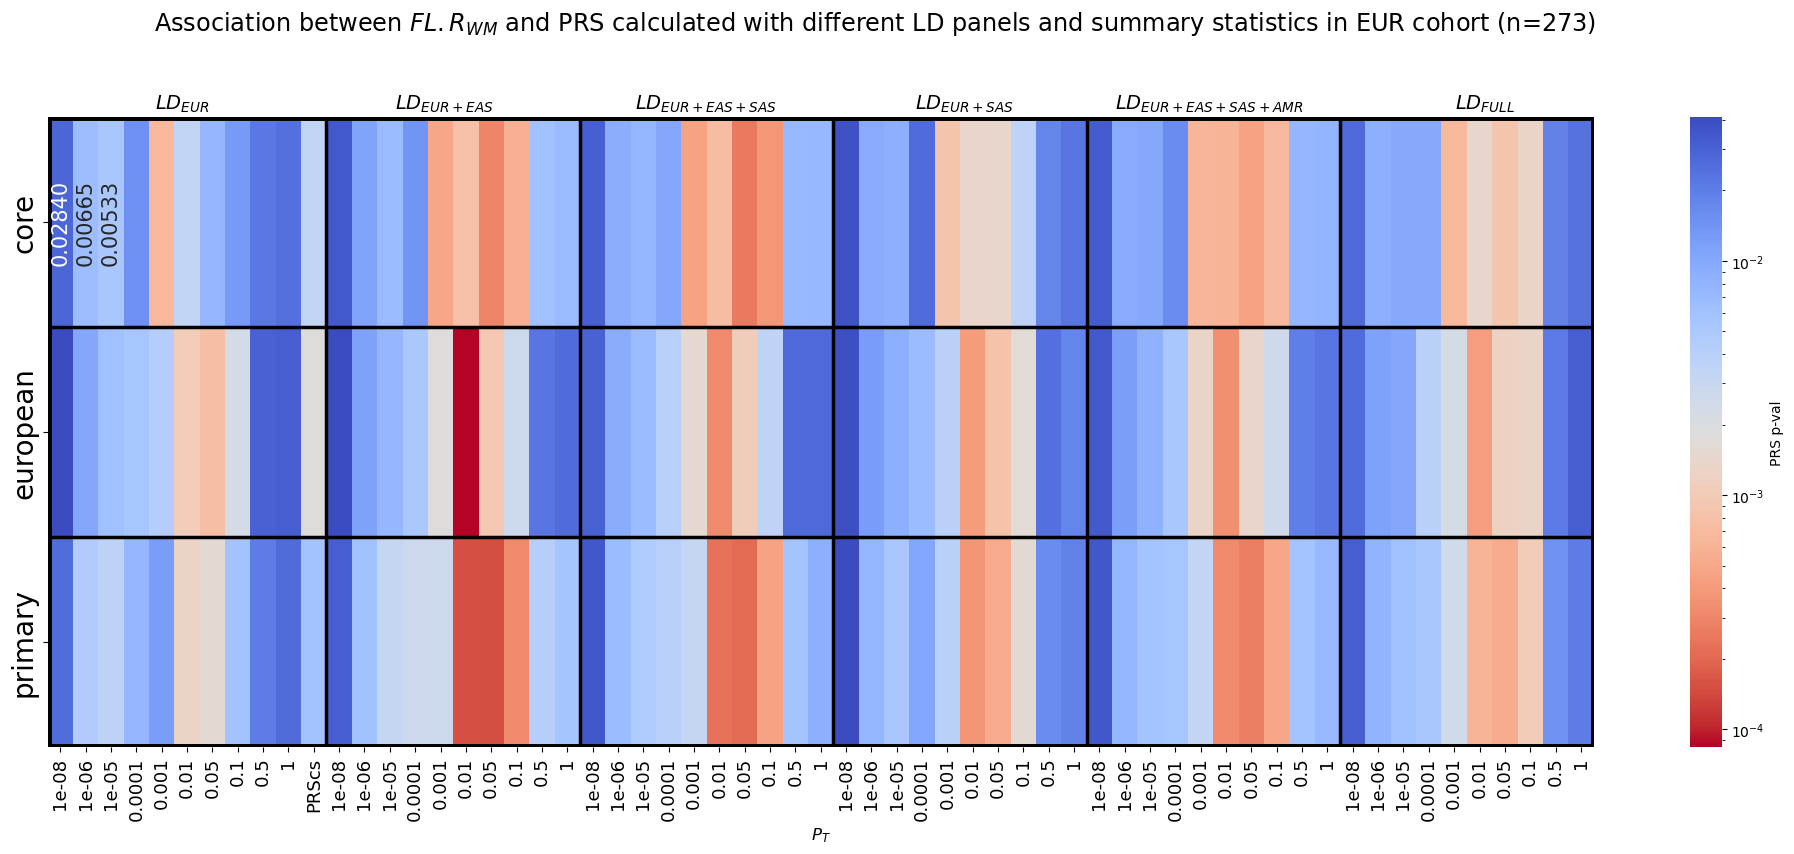

In [15]:
from matplotlib.colors import LogNorm, Normalize

fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(euro_result_to_plot,ax=ax,annot=True,fmt='.5f', annot_kws={'rotation': 90,'fontsize':15},norm=LogNorm(),square=False,
           cmap='coolwarm_r', cbar_kws={'label': 'PRS p-val'})

y_color_line='k'
ax.axhline(y=0, color=y_color_line,linewidth=5)
ax.axhline(y=3, color=y_color_line,linewidth=5)
ax.axhline(y=1, color=y_color_line,linewidth=2.5)
ax.axhline(y=2, color=y_color_line,linewidth=2.5)
ax.axvline(x=11, color='k',linewidth=2.5)
ax.axvline(x=21, color='k',linewidth=2.5)
ax.axvline(x=31, color='k',linewidth=2.5)
ax.axvline(x=41, color='k',linewidth=2.5)
ax.axvline(x=51, color='k',linewidth=2.5)
ax.axvline(x=61, color='k',linewidth=5)
ax.axvline(x=0, color='k',linewidth=5)

fig_y_text=.75
fig.text(0.08, fig_y_text, '$LD_{EUR}$', fontsize=14)
fig.text(0.20, fig_y_text, '$LD_{EUR+EAS}$', fontsize=14)
fig.text(0.32,fig_y_text, '$LD_{EUR+EAS+SAS}$', fontsize=14)
fig.text(0.46, fig_y_text, '$LD_{EUR+SAS}$', fontsize=14)
fig.text(0.56,fig_y_text, '$LD_{EUR+EAS+SAS+AMR}$', fontsize=14)
fig.text(0.73, fig_y_text, '$LD_{FULL}$', fontsize=14)


ax.set_yticklabels(euro_result_to_plot.index,fontsize=20)
ax.set_xticklabels(euro_result_to_plot.columns,fontsize=13)
ax.set_ylabel('')
ax.set_xlabel('$P_T$',fontsize=12)

fig.suptitle('Association between $FL.R_{WM}$ and PRS calculated with different LD panels and summary statistics in EUR cohort (n=273)',x=0.44,y=0.85,fontsize='xx-large')
fig.tight_layout(rect=[0,0,1,0.8])
# fig.savefig('test.png',dpi=300)

In [115]:
stats.MultipleCorrection.matSpDLite(df[[i for i in df.columns if 'SCZ_PRS' in i and 'asian' not in i]].corr())

Effective Number of Independent Variables [Veff] is 65.18009218889873
Effective Number of Independent Variables [VeffLi] (Using equation 5 of Li and Ji 2005) is 16.0
The adjusted multiple testing correction p-val is alpha/lower(Meff) = 0.0031250000000000123


15.999999999999938

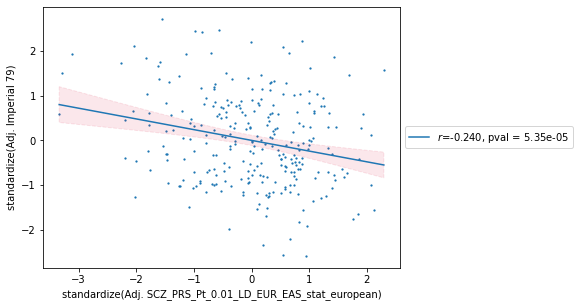

In [83]:
visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european',
                                  y='Imperial 79', adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,4)],
                                                                'y':['GA','PMA','TBV']},
                                 data = df)

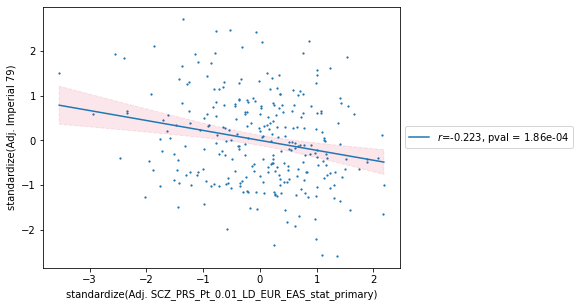

In [84]:
visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_primary',
                                  y='Imperial 79', adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,4)],
                                                                'y':['GA','PMA','TBV']},
                                 data = df)

In [345]:
df = pd.read_csv('mixed_cohort_segmented_scz_prs_all.csv')

In [346]:
thresholds = [i for i in df.columns if 'SCZ_PRS_Pt_0.001' in i]

In [347]:
df_SCZ_PRS_Pt_00001 = df[thresholds].copy()

In [348]:
df_SCZ_PRS_Pt_00001.columns = ['_'.join(i.split('_')[4:]) for i in df_SCZ_PRS_Pt_00001.columns]

In [349]:
corr = df_SCZ_PRS_Pt_00001.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

Text(0.5, 1.0, 'Correlation between PRS scores at $P_T$ = 0.001 using different LD panel and summary stats')

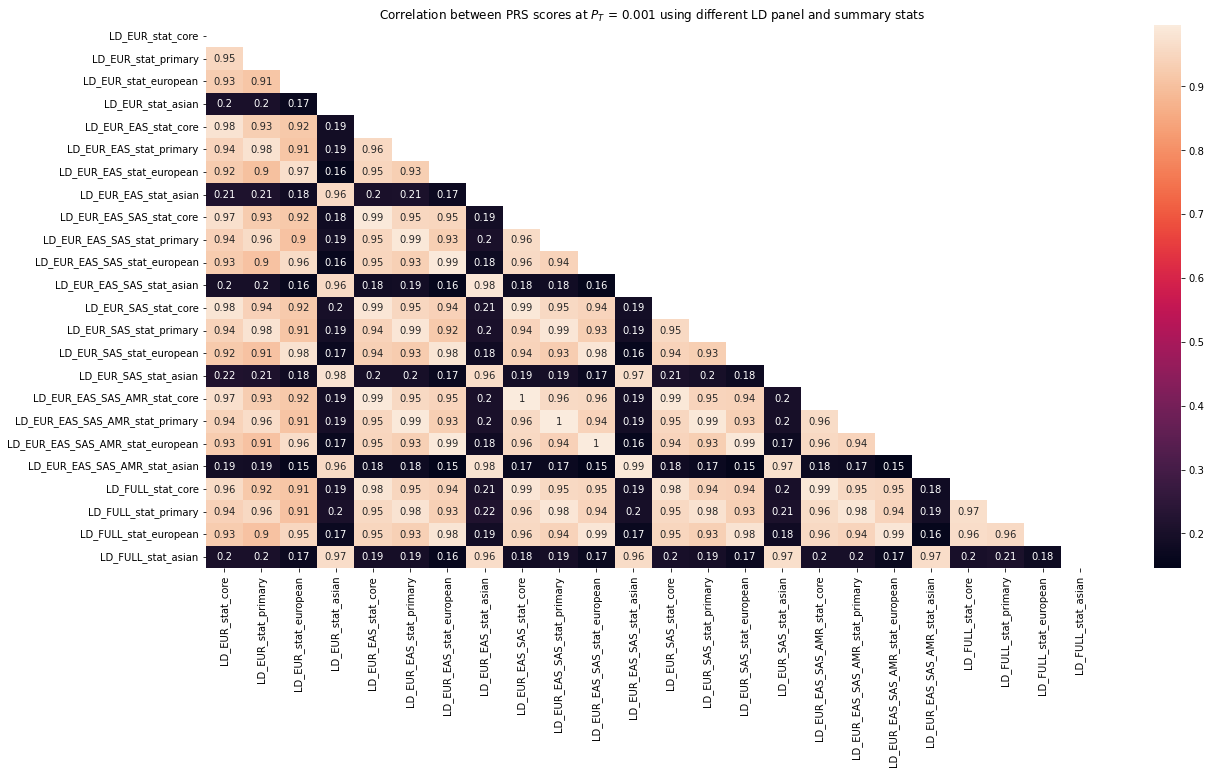

In [350]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,mask=mask,annot=True,ax = ax)
ax.set_title('Correlation between PRS scores at $P_T$ = 0.001 using different LD panel and summary stats')
# fig.savefig('correlation_map.png')

In [351]:
thresholds = [i for i in df.columns if 'SCZ_PRS_Pt_0.001' in i and 'asian' not in i]

In [352]:
df_SCZ_PRS_Pt_00001_ex_asian = df[thresholds].copy()

In [353]:
df_SCZ_PRS_Pt_00001_ex_asian.columns = ['_'.join(i.split('_')[4:]) for i in df_SCZ_PRS_Pt_00001_ex_asian.columns]

In [376]:
mixed_result = stats.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
    df,
    thresholds=[i for i in df.columns if 'SCZ_PRS' in i],
    cat_independentVar_cols=['sex'],
    cont_independentVar_cols=['GA','PMA','TBV']+[f'euro_Anc_PC{i}' for i in range(1,6)],
    dependentVar_cols=['Imperial 79']
)

100%|█████████████████████████████████████████| 243/243 [00:14<00:00, 17.14it/s]


In [377]:
mixed_result['pt'] =mixed_result['threshold'].apply(lambda x: x.split('_')[3]) 

In [378]:
mixed_result['LD'] = mixed_result['threshold'].apply(lambda x: '_'.join(x.split('_')[4:-2]))

In [379]:
mixed_result['stat'] = mixed_result['threshold'].apply(lambda x: x.split('_')[-1])

In [380]:
mixed_result.loc[mixed_result['LD']=='','LD'] = 'LD_EUR'

In [359]:
mixed_result.sort_values(by='PRS_pval')

,Connection,Intercept_coef,Intercept_pval,C(sex)[T.male]_coef,C(sex)[T.male]_pval,standardize(GA)_coef,standardize(GA)_pval,standardize(PMA)_coef,standardize(PMA)_pval,standardize(TBV)_coef,...,standardize(Q('euro_Anc_PC4'))_coef,standardize(Q('euro_Anc_PC4'))_pval,standardize(Q('euro_Anc_PC5'))_coef,standardize(Q('euro_Anc_PC5'))_pval,PRS_coef,PRS_pval,threshold,pt,LD,stat
58,Imperial 79,29880.719163,0.0,263.513232,0.066787,83.940815,0.303085,-1831.473527,4.694292e-39,4265.622707,...,-36.135213,0.588879,-52.729014,0.434138,-339.985012,0.000011,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european,0.01,LD_EUR_EAS,european
48,Imperial 79,29873.484285,0.0,277.726127,0.054080,79.075191,0.334194,-1811.010616,6.724193e-38,4258.366434,...,-31.737296,0.636226,-39.945283,0.555910,-307.971425,0.000039,SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_primary,0.01,LD_EUR_EAS,primary
148,Imperial 79,29881.837598,0.0,261.316068,0.070362,91.904077,0.261183,-1839.276565,4.169535e-39,4272.868325,...,-37.739101,0.574069,-50.865195,0.452549,-309.772718,0.000046,SCZ_PRS_Pt_0.01_LD_EUR_EAS_SAS_AMR_stat_european,0.01,LD_EUR_EAS_SAS_AMR,european
78,Imperial 79,29873.286447,0.0,278.114780,0.053864,77.785845,0.342512,-1806.955047,1.139531e-37,4255.667097,...,-32.525546,0.628041,-40.659899,0.549013,-296.910796,0.000047,SCZ_PRS_Pt_0.01_LD_EUR_EAS_SAS_stat_primary,0.01,LD_EUR_EAS_SAS,primary
79,Imperial 79,29864.636951,0.0,295.106690,0.040727,80.457667,0.325973,-1826.712034,1.442430e-38,4270.140067,...,-40.112750,0.550351,-44.123671,0.515174,-314.258049,0.000047,SCZ_PRS_Pt_0.05_LD_EUR_EAS_SAS_stat_primary,0.05,LD_EUR_EAS_SAS,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Imperial 79,29852.582590,0.0,318.787446,0.029980,98.145228,0.237944,-1863.730421,5.292534e-39,4280.467831,...,-30.373919,0.656392,-56.956288,0.408045,-252.156577,0.015347,SCZ_PRS_Pt_0.5_LD_EUR_EAS_stat_european,0.5,LD_EUR_EAS,european
62,Imperial 79,29852.195299,0.0,319.548278,0.029650,96.295511,0.247085,-1861.519322,6.821823e-39,4278.425404,...,-30.345245,0.656766,-55.899421,0.416994,-251.037369,0.016590,SCZ_PRS_Pt_1_LD_EUR_EAS_stat_european,1,LD_EUR_EAS,european
182,Imperial 79,29860.356904,0.0,303.514829,0.038549,95.776132,0.249736,-1862.844732,6.099340e-39,4286.014143,...,-32.527013,0.633845,-56.808680,0.409441,-242.029974,0.017384,SCZ_PRS_Pt_1_LD_FULL_stat_european,1,LD_FULL,european
31,Imperial 79,29851.378798,0.0,321.152292,0.029243,96.252904,0.248189,-1862.171578,8.694681e-39,4282.294424,...,-24.600431,0.719533,-56.970672,0.408928,-274.550361,0.032249,SCZ_PRS_Pt_1_LD_EUR_stat_european,1,LD_EUR,european


In [381]:
mixed_result_to_plot = mixed_result[['PRS_pval','pt','LD','stat']].copy()

In [382]:
mixed_result_to_plot = pd.pivot(mixed_result_to_plot,columns=['LD','pt'],index=['stat'],values=['PRS_pval'])

In [383]:
mixed_result_to_plot.columns = mixed_result_to_plot.columns.droplevel()

In [384]:
mixed_result_to_plot.columns = mixed_result_to_plot.columns.droplevel()

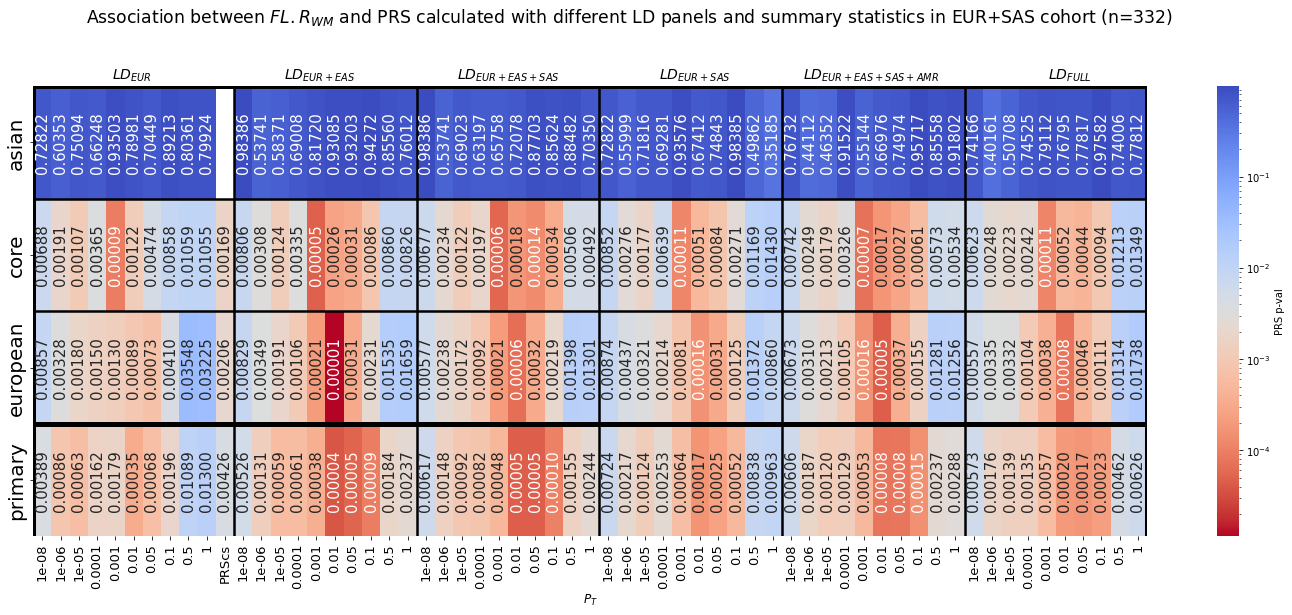

In [386]:
from matplotlib.colors import LogNorm, Normalize

fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(mixed_result_to_plot,ax=ax,annot=True,fmt='.5f', annot_kws={'rotation': 90,'fontsize':15},norm=LogNorm(),square=False,
           cmap='coolwarm_r', cbar_kws={'label': 'PRS p-val'})

y_color_line='k'
ax.axhline(y=0, color=y_color_line,linewidth=5)
ax.axhline(y=3, color=y_color_line,linewidth=5)
ax.axhline(y=1, color=y_color_line,linewidth=2.5)
ax.axhline(y=2, color=y_color_line,linewidth=2.5)
ax.axvline(x=11, color='k',linewidth=2.5)
ax.axvline(x=21, color='k',linewidth=2.5)
ax.axvline(x=31, color='k',linewidth=2.5)
ax.axvline(x=41, color='k',linewidth=2.5)
ax.axvline(x=51, color='k',linewidth=2.5)
ax.axvline(x=61, color='k',linewidth=5)
ax.axvline(x=0, color='k',linewidth=5)

fig_y_text=.75
fig.text(0.08, fig_y_text, '$LD_{EUR}$', fontsize=14)
fig.text(0.20, fig_y_text, '$LD_{EUR+EAS}$', fontsize=14)
fig.text(0.32,fig_y_text, '$LD_{EUR+EAS+SAS}$', fontsize=14)
fig.text(0.46, fig_y_text, '$LD_{EUR+SAS}$', fontsize=14)
fig.text(0.56,fig_y_text, '$LD_{EUR+EAS+SAS+AMR}$', fontsize=14)
fig.text(0.73, fig_y_text, '$LD_{FULL}$', fontsize=14)


ax.set_yticklabels(mixed_result_to_plot.index,fontsize=20)
ax.set_xticklabels(mixed_result_to_plot.columns,fontsize=13)
ax.set_ylabel('')
ax.set_xlabel('$P_T$',fontsize=12)

fig.suptitle('Association between $FL.R_{WM}$ and PRS calculated with different LD panels and summary statistics in EUR+SAS cohort (n=332)',x=0.44,y=0.85,fontsize='xx-large')
fig.tight_layout(rect=[0,0,1,0.8])
# fig.savefig('different_LD_different_sum_stat_mixed.png',dpi=300)

In [370]:
np.min(mixed_result_to_plot.values)

1.137155070729146e-05

In [373]:
np.max(euro_result_to_plot.values)

0.03693436137071622

All cohorts

In [388]:
!ls *.csv

eur_cohort_segmented_scz_prs_all.csv
eur_eas_cohort_segmented_scz_prs_all.csv
eur_sas_eas_amr_afr_cohort_segmented_scz_prs_all.csv
eur_sas_eas_amr_cohort_segmented_scz_prs_all.csv
eur_sas_eas_cohort_segmented_scz_prs_all.csv
full_cohort_segmented_scz_prs_all.csv
mixed_cohort_segmented_scz_prs_all.csv


In [389]:
import glob

In [392]:
all_files = [i for i in glob.glob('*.csv') if 'eur_cohort' not in i and 'mixed_cohort' not in i]

In [394]:
all_files

['eur_sas_eas_amr_cohort_segmented_scz_prs_all.csv',
 'eur_sas_eas_cohort_segmented_scz_prs_all.csv',
 'eur_sas_eas_amr_afr_cohort_segmented_scz_prs_all.csv',
 'eur_eas_cohort_segmented_scz_prs_all.csv',
 'full_cohort_segmented_scz_prs_all.csv']

In [398]:
[i.split('_')[0:-4] for i in all_files]

[['eur', 'sas', 'eas', 'amr', 'cohort'],
 ['eur', 'sas', 'eas', 'cohort'],
 ['eur', 'sas', 'eas', 'amr', 'afr', 'cohort'],
 ['eur', 'eas', 'cohort'],
 ['full', 'cohort']]

In [406]:
all_result_dict = defaultdict(pd.DataFrame)
for file in all_files:
    if len(file.split('_')[0:-4])-1 >= 4 or len(file.split('_')[0:-4])-1 ==1:
        n = 10
    elif len(file.split('_')[0:-4])-1 == 3:
        n = 7
    else:
        n = 5
    name = '_'.join(file.split('_')[0:-4])
    print(name,n)
    df = pd.read_csv(file)
    all_result_dict[name] = stats.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
        df,
    thresholds=[i for i in df.columns if 'SCZ_PRS' in i and 'asian' not in i],
    cat_independentVar_cols=['sex'],
    cont_independentVar_cols=['GA','PMA','TBV']+[f'euro_Anc_PC{i}' for i in range(1,n+1)],
    dependentVar_cols=['Imperial 79']
)

eur_sas_eas_amr_cohort 10


100%|█████████████████████████████████████████| 180/180 [00:14<00:00, 12.33it/s]


eur_sas_eas_cohort 7


100%|█████████████████████████████████████████| 180/180 [00:11<00:00, 15.72it/s]


eur_sas_eas_amr_afr_cohort 10


100%|█████████████████████████████████████████| 180/180 [00:15<00:00, 11.63it/s]


eur_eas_cohort 5


100%|█████████████████████████████████████████| 180/180 [00:08<00:00, 20.15it/s]


full_cohort 10


100%|█████████████████████████████████████████| 180/180 [00:16<00:00, 10.61it/s]


In [409]:
for k in all_result_dict.keys():
    all_result_dict[k]['cohort'] = k

In [414]:
all_results = pd.concat([all_result_dict[k] for k in all_result_dict.keys()],axis=0)

In [415]:
all_results['pt'] =all_results['threshold'].apply(lambda x: x.split('_')[3]) 

all_results['LD'] = all_results['threshold'].apply(lambda x: '_'.join(x.split('_')[4:-2]))

all_results['stat'] = all_results['threshold'].apply(lambda x: x.split('_')[-1])

In [423]:
# all_results.to_csv('all_results.csv',index=False)

In [97]:
all_results = pd.read_csv('all_results.csv')

In [101]:
all_results.cohort = pd.Categorical(all_results.cohort.tolist(),categories=['eur_eas_cohort','eur_sas_eas_cohort','eur_sas_eas_amr_cohort','eur_sas_eas_amr_afr_cohort','full_cohort'],ordered=True)

In [103]:
all_results_to_plot = pd.pivot(all_results,columns=['LD','pt'],index=['cohort','stat'],values=['PRS_pval'])

In [104]:
cohorts = all_results_to_plot.index.get_level_values(0)

In [106]:
all_results_to_plot.columns = all_results_to_plot.columns.droplevel()
all_results_to_plot.columns = all_results_to_plot.columns.droplevel()
all_results_to_plot.index = all_results_to_plot.index.droplevel()

In [107]:
annot_labels = np.array([[format(num, '.6f') for num in row] for row in all_results_to_plot.values])
annot_mask = all_results_to_plot.values > 0.0001
annot_labels[annot_mask] = ''

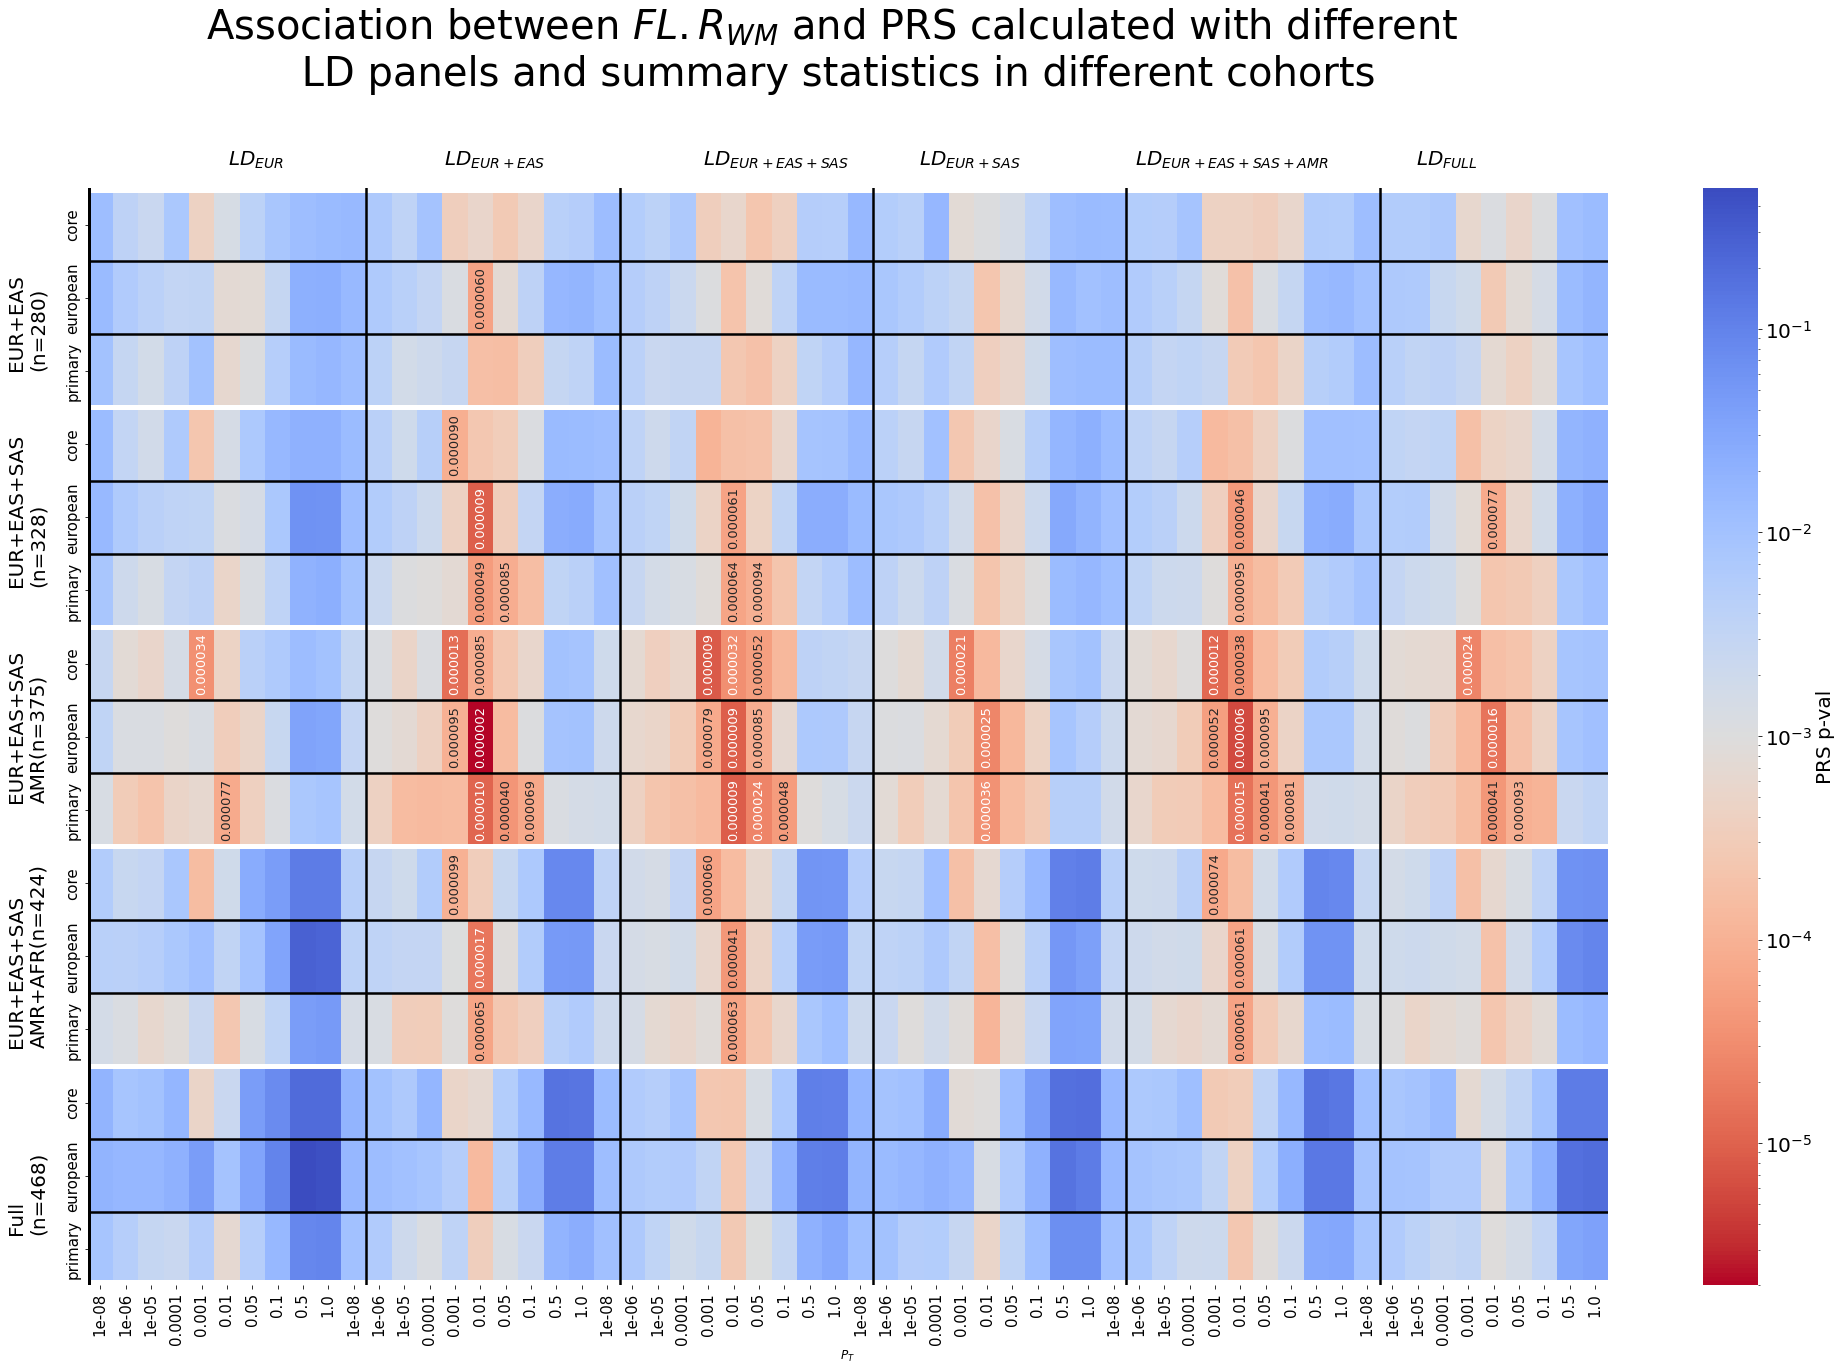

In [149]:
from matplotlib.colors import LogNorm, Normalize

fig,ax = plt.subplots(1,1,figsize=(30,20))
sns.heatmap(all_results_to_plot,ax=ax,annot=annot_labels, fmt='', annot_kws={'rotation': 90,'fontsize':13},norm=LogNorm(),square=False,
           cmap='coolwarm_r', cbar_kws={'label': 'PRS p-val'})

y_color_line='k'
for i in range(0,16):
    ax.axhline(y=i, color=y_color_line,linewidth=2.5)
for i in range(0,16,3):
    ax.axhline(y=i, color='w',linewidth=5)
ax.axhline(y=0,color='w',linewidth=10)
ax.axhline(y=15,color='w',linewidth=10)
ax.axvline(x=11, color='k',linewidth=2.5)
ax.axvline(x=21, color='k',linewidth=2.5)
ax.axvline(x=31, color='k',linewidth=2.5)
ax.axvline(x=41, color='k',linewidth=2.5)
ax.axvline(x=51, color='k',linewidth=2.5)
ax.axvline(x=61, color='k',linewidth=5)
ax.axvline(x=0, color='k',linewidth=5)


ax.set_yticklabels(all_results_to_plot.index,fontsize=15)
ax.set_xticklabels(all_results_to_plot.columns,fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('$P_T$',fontsize=12)

fig_y_text=0.84
fig.text(0.18, fig_y_text, '$LD_{EUR}$', fontsize=20)
fig.text(0.28, fig_y_text, '$LD_{EUR+EAS}$', fontsize=20)
fig.text(0.40,fig_y_text, '$LD_{EUR+EAS+SAS}$', fontsize=20)
fig.text(0.50, fig_y_text, '$LD_{EUR+SAS}$', fontsize=20)
fig.text(0.60,fig_y_text, '$LD_{EUR+EAS+SAS+AMR}$', fontsize=20)
fig.text(0.73, fig_y_text, '$LD_{FULL}$', fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('PRS p-val',size=20)

fig_x_text = 0.078
fontsize=20
fig.text(fig_x_text, 0.7 , 'EUR+EAS\n(n=280)', fontsize=fontsize,rotation=90)
fig.text(fig_x_text, 0.55 , 'EUR+EAS+SAS\n(n=328)', fontsize=fontsize,rotation=90)
fig.text(fig_x_text, 0.40, 'EUR+EAS+SAS\nAMR(n=375)', fontsize=fontsize,rotation=90)
fig.text(fig_x_text, 0.23 , 'EUR+EAS+SAS\nAMR+AFR(n=424)', fontsize=fontsize,rotation=90)
fig.text(fig_x_text, 0.1 , 'Full\n(n=468)', fontsize=fontsize,rotation=90)


fig.suptitle('Association between $FL.R_{WM}$ and PRS calculated with different \n LD panels and summary statistics in different cohorts',x=0.46,y=0.95,fontsize=40)

fig.tight_layout(rect=[0.1,0,1,.9])
fig.savefig('different_LD_different_sum_stat_all_cohorts.png')

In [4]:
df_euro = pd.read_csv('eur_cohort_segmented_scz_prs_all.csv')
df_mixed = pd.read_csv('mixed_cohort_segmented_scz_prs_all.csv')

In [5]:
[i for i in df_euro.columns if 'SCZ_PRS' in i ]

['SCZ_PRS_Pt_1e-08_LD_EUR_stat_core',
 'SCZ_PRS_Pt_1e-06_LD_EUR_stat_core',
 'SCZ_PRS_Pt_1e-05_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.0001_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.001_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.01_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.05_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.1_LD_EUR_stat_core',
 'SCZ_PRS_Pt_0.5_LD_EUR_stat_core',
 'SCZ_PRS_Pt_1_LD_EUR_stat_core',
 'SCZ_PRS_SCORESUM_PRScs_stat_core',
 'SCZ_PRS_Pt_1e-08_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_1e-06_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_1e-05_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.0001_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.001_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.01_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.05_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.1_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_0.5_LD_EUR_stat_primary',
 'SCZ_PRS_Pt_1_LD_EUR_stat_primary',
 'SCZ_PRS_SCORESUM_PRScs_stat_primary',
 'SCZ_PRS_Pt_1e-08_LD_EUR_stat_european',
 'SCZ_PRS_Pt_1e-06_LD_EUR_stat_european',
 'SCZ_PRS_Pt_1e-05_LD_EUR_stat_european',
 'SCZ_PRS_Pt_0.0001_LD_EU

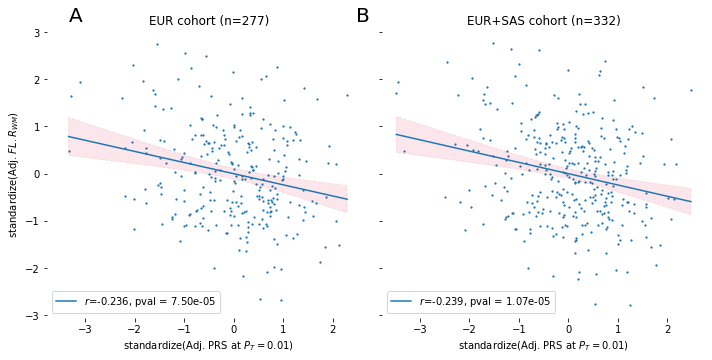

In [36]:
fig,axes = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european',
                                  y = 'Imperial 79',
                                  adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,4)],
                                                'y':['GA','PMA','TBV','sex']},
                                  ax=axes[0],
                                  data = df_euro,legend_loc='lower left',
                                  xlabel='PRS at $P_T = 0.01$',ylabel='$FL.R_{WM}$')
visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european',
                                  y = 'Imperial 79',
                                  adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,6)],
                                                'y':['GA','PMA','TBV','sex']},
                                  ax=axes[1],xlabel='PRS at $P_T = 0.01$',
                                  data = df_mixed,legend_loc='lower left')
axes[1].set_ylabel('')
axes[0].set_title('EUR cohort (n=277)')
axes[1].set_title('EUR+SAS cohort (n=332)')
sns.despine(bottom=True,left=True)
fig.tight_layout()
# fig.savefig('association_supplementary_figure')
fig.text(0.1,0.95,'A',fontsize=20)
fig.text(0.5,.95,'B',fontsize=20)
fig.savefig('association_supplementary_figure.png')


In [39]:
last_model,_ = stats.MassUnivariate.mass_univariate(df_euro,
                                     cat_independentVar_cols=['sex'],
                                     cont_independentVar_cols=['GA','PMA','TBV','SCZ_PRS_Pt_0.01_LD_EUR_EAS_stat_european'],

                                     dependentVar_cols=['Imperial 79'])

In [8]:

SCZ_res = pd.read_csv('SCZ_res.csv',sep='\t')

synapse, neuron_porjection, gomf_rna, polymerase, terminal domain, phospherine binding

In [16]:
SCZ_res = SCZ_res.sort_values(by='adjP')
                                    

In [17]:
SCZ_res = SCZ_res[~SCZ_res['GeneSet'].isin(['GOCC_SYNAPSE','GOCC_NEURON_PROJECTION'])]
SCZ_res = SCZ_res[SCZ_res['adjP']<0.05]

In [236]:
SCZ_res.head(2)

,GeneSet,N_genes,N_overlap,p,genes,adjP
11218,GOCC_SYNAPTIC_MEMBRANE,371,29,2.232338e-12,23385:9378:80059:2066:2917:491:6538:64084:2287...,2.937533e-08
11278,GOCC_PLASMA_MEMBRANE_REGION,1229,54,1.212122e-11,2268:7804:23385:9378:80059:117583:2066:2917:49...,1.595032e-07


In [11]:
best_SNPs_after_thresholded = pd.read_csv('SCZ_best_snp_after_thresholded.csv')

In [12]:
SCZ_gene_list, SCZ_snp_list = genes.SNPsFunctionalAnalysis.SNPs_annotation_to_gene(snps_list=best_SNPs_after_thresholded.SNP.tolist(),
                                                     gene_build_path=f'../../dataset/genetic_dataset/gene_build/NCBI37.3.gene.loc',
                                                    window_size=0)

In [239]:
SCZ_best_genes = best_SNPs_after_thresholded.merge(SCZ_snp_list,left_on='SNP',right_on='SNP_ID')


In [240]:
SCZ_best_genes['Genes_Name'] = SCZ_best_genes['Genes_Name'].apply(lambda x: x[0])
SCZ_gene_list['NAME'] = SCZ_gene_list['NAME'].apply(lambda x: x[0])

SCZ_best_genes = SCZ_best_genes.merge(SCZ_gene_list[['NAME','N_SNP']],left_on=['Genes_Name'],right_on=['NAME'])


In [3]:
snp_file = pd.read_table('../../dataset/preprocessed_dataset/batch2_HAI/EUR/PRS/PRSice/batch2_EUR_genotyped.50.SCZ.european.ld_EUR_EAS.snp')

In [242]:
SCZ_best_genes = SCZ_best_genes.merge(snp_file,on='SNP',suffixes=['_FL.WM','_SCZ'])

In [243]:
dicitonary_name_genes = SCZ_gene_list[['Gene_ID','NAME']].set_index('Gene_ID')['NAME'].to_dict()

In [244]:
SCZ_res['genes'] = SCZ_res['genes'].apply(lambda x: ':'.join([dicitonary_name_genes[int(i)] for i in x.split(':')]))

In [270]:
SCZ_best_res = SCZ_res[SCZ_res['adjP']<0.05].reset_index(drop=True)

In [257]:
SCZ_best_res['Proportion'] = SCZ_best_res['N_overlap']/SCZ_best_res['N_genes']

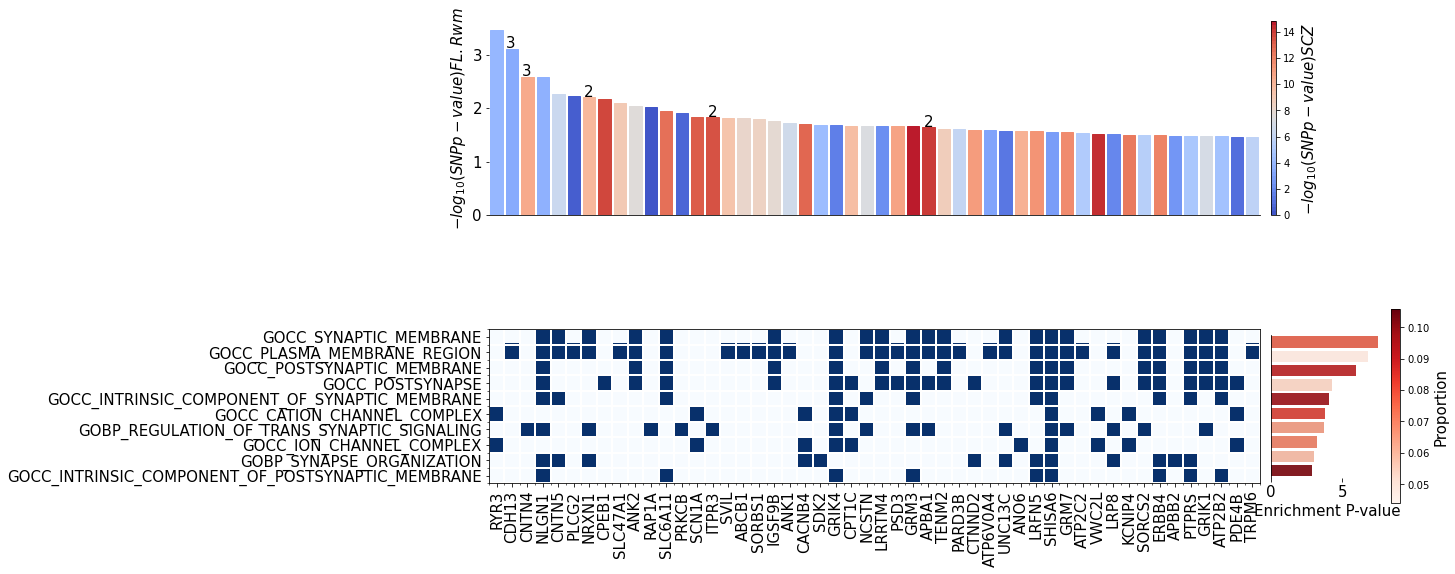

In [264]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4,8,width_ratios=[1,1,1,1,6,1,1,1])

ax_barplot_top = fig.add_subplot(gs[0,0:6])
ax_heatmap = fig.add_subplot(gs[1,0:6])
ax_enrichment = fig.add_subplot(gs[1,6:8])

heatmap,all_genes,gene_sets = visualisation.Geneset.create_heatmap(SCZ_best_res,
                                                         genes_set_column = 'GeneSet',
                                                         genes_list_column = 'genes',
                                                         gene_table = SCZ_best_genes,
                                                         top = 50,
                                                         ordered_by = 'P_FL.WM',
                                                         gene_table_gene_name='Genes_Name'
                                                        )

visualisation.Geneset.visualise_heatmap(heatmap=heatmap,
                                        all_genes=all_genes,
                                        gene_sets=gene_sets,
                                        ax=ax_heatmap)
ax_heatmap.set_aspect(1)
ax_heatmap.tick_params('y',rotation=0)
ax_heatmap.tick_params('x',rotation=90)


cbar_ax = fig.add_subplot(gs[0,6])
divider = make_axes_locatable(cbar_ax)
cax = divider.append_axes('left', size='10%', pad=0.05)

visualisation.Geneset.visualise_gene_p_value(gene_table=SCZ_best_genes,
                                            all_genes=all_genes,
                                            gene_table_gene_name='Genes_Name',
                                            ordered_by='P_FL.WM',
                                            coloured_by='P_SCZ',
                                            p_threshold=None,
                                            bar_number='N_SNP',
                                             ax=ax_barplot_top,
                                            cbar_ax = cax,ylabel='FL.Rwm',cbar_label='SCZ')
ax_barplot_top.tick_params('y',labelsize=15)
sns.despine(top=True,left=True,right=True,ax=ax_barplot_top)
sns.despine(top=True,left=True,right=True,bottom=True,ax=cbar_ax)
cbar_ax.axis('off')

aspect = 1
ax_enrichment.set_aspect(aspect)
visualisation.Geneset.visualise_enrichment_p_value(SCZ_best_res,
                                                   x = 'adjP',
                                                   y='GeneSet',
                                                   xlabel='Enrichment P-value',
                                                   ax=ax_enrichment)
ax_enrichment.tick_params('x',labelsize=15)
ax_enrichment.set_xlabel('Enrichment P-value',fontsize=15)
sns.despine(top=True,bottom=True,right=True,ax=ax_enrichment)
plt.tight_layout()
fig.savefig('heatmap_with_pval_barplot_10.png')

In [321]:
to_copy = SCZ_best_res[['GeneSet','N_genes','N_overlap','adjP']].copy()

In [322]:
to_copy['adjP'] = to_copy['adjP'].apply(lambda x: "{:.2e}".format(x))

In [323]:
to_copy['GeneSet'] = to_copy['GeneSet'].apply(lambda x: x.replace('_',' '))

In [325]:
to_copy['adjP'] = to_copy['adjP'].apply(lambda x: '$'+x.replace('e'," \\times 10^{")+'}$')

In [328]:
to_copy = to_copy.set_index('GeneSet')

In [329]:
print(to_copy.style.to_latex())

\begin{tabular}{lrrl}
 & N_genes & N_overlap & adjP \\
GeneSet &  &  &  \\
GOCC SYNAPTIC MEMBRANE & 371 & 29 & $2.94 \times 10^{-08}$ \\
GOCC PLASMA MEMBRANE REGION & 1229 & 54 & $1.60 \times 10^{-07}$ \\
GOCC POSTSYNAPTIC MEMBRANE & 270 & 23 & $1.10 \times 10^{-06}$ \\
GOCC POSTSYNAPSE & 605 & 32 & $4.89 \times 10^{-05}$ \\
GOCC INTRINSIC COMPONENT OF SYNAPTIC MEMBRANE & 159 & 16 & $8.12 \times 10^{-05}$ \\
GOCC CATION CHANNEL COMPLEX & 214 & 18 & $1.58 \times 10^{-04}$ \\
GOBP REGULATION OF TRANS SYNAPTIC SIGNALING & 413 & 25 & $2.00 \times 10^{-04}$ \\
GOCC ION CHANNEL COMPLEX & 286 & 20 & $5.55 \times 10^{-04}$ \\
GOBP SYNAPSE ORGANIZATION & 415 & 24 & $9.28 \times 10^{-04}$ \\
GOCC INTRINSIC COMPONENT OF POSTSYNAPTIC MEMBRANE & 123 & 13 & $1.22 \times 10^{-03}$ \\
GOCC NEURON TO NEURON SYNAPSE & 344 & 21 & $2.56 \times 10^{-03}$ \\
GOBP CELL JUNCTION ORGANIZATION & 681 & 31 & $2.61 \times 10^{-03}$ \\
GOBP NEUROGENESIS & 1608 & 53 & $5.05 \times 10^{-03}$ \\
GOBP BIOLOGICAL ADHESI